****
**The Ai Academy**
****

### Regression model.
* Predict an actual numerical value the price of a used car.
* ABC Motors, owns an e-commerce platform that acts as a middleman between people looking to buy and sell pre-owned cars. 
* They have tons of data from past sales, both through their platform and other sources. Their goal is simple, to make sales happen quickly.
* If the price is appropriate, cars will sell faster. So, ABC Motors wants to develop an algorithm to predict the price of cars based on various attributes of the car.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* ABC Motors has data on around ***50,000 cars** that have been sold or processed in various ways. There are 19 variables associated with this problem.
* One of these variables is our target, which is the price of the car. The other variables contain information that will help us predict the car's price. 
* One variable is called **"date Crawled,"** which is of date type. This variable indicates when the ad for the car was first crawled or viewed. Essentially, it tells us when people first started looking at this car.
* Another variable is **"name,"** and it’s a bit more complex. This variable, which is a string, can include the car name, brand, model, and more. It’s a composite string, and you'll notice in this dataset that the information isn't always consistent in order.
* The **"seller"** type, variable indicates whether the seller is a private individual or a commercial entity. Then there's the "offer type," which tells us if the buyer made an offer after seeing a specific car or if the price is what the seller asked for initially.
* The **"price"** variable is our outcome variable – it’s the listed price to sell the car. This is what we're trying to predict. The way these ads are set up, they come with certain characteristics. Storm Motors also conducts specific studies, so ads could be classified as either "test" or "control," and this is noted as a string.
* **"Vehicle type"** is another string variable, indicating if the car is a cabrio, SUV, coupe, or one of five other types. The "year of registration" is an integer that tells us when the car was first registered.
* **Gearbox,"** which can be manual or automatic. We also have "power," an integer representing the car's power, and this can have multiple values.
* **Model:** This refers to the specific model type of the car. For example, if it's a Hyundai, is it an i10, i20, etc.?

* **Month of Registration:** This tells us the month in which the car was first registered.

* **Fuel Type:** This variable indicates whether the car runs on petrol, diesel, or one of five other fuel types.

* **Brand:** What brand is the car? Is it a BMW, Mercedes, or something else?
* **Not Repaired Damage.** This string variable indicates if the car has any unrepaired damage. If the value is "yes," it means there has been damage that hasn't been repaired. If it's "no," the damage has been repaired and rectified. You can see how this might significantly affect the car's price.
* **Date Created:** The date when the ad was created on Storm Motors.
* **Postal Code:** The postal code of the seller, which can provide location-specific information.
* **Last Seen:** This indicates when the ad was last seen online by a crawler, giving us an idea of the most recent activity and interest in the car.




In [2]:
df = pd.read_csv('Usedcars.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


*****
* let's break down the variables and understand their potential impact on predicting the price of pre-owned cars.
* Think about it this way: each variable we have could potentially influence the car's price. For instance, if a car isn't getting much attention (i.e., not many people are looking at the ad), it might be priced too high, and we might need to adjust the price to attract more buyers.
* We can group these variables into different categories:
### Vehicle Specifications
- **Gearbox**: Whether the car has a manual or automatic transmission.
- **Power**: The horsepower of the car.
- **Fuel Type**: Whether the car runs on petrol, diesel, or another fuel type.

### Condition of the Car
- **Not Repaired Damage**: Indicates if the car has unrepaired damage.
- **Kilometres**: The total distance the car has been driven, which can give us an idea of how old and worn out the car might be.

### Seller Details
- **Seller**: Whether the seller is a private individual or a commercial entity.

### Registration Details
- **Year of Registration**: The year the car was first registered.
- **Month of Registration**: The month the car was first registered.

### Car Make and Model
- **Model**: The specific model type of the car (e.g., Hyundai i10, i20).
- **Brand**: The brand of the car (e.g., BMW, Mercedes).

### Advertisement Details
- **Date Created**: The date when the ad was first created.
- **Last Seen**: The last time the ad was seen online.
- **Postal Code**: The location of the seller, which might influence the price due to regional demand.


### Steps to Approach the Problem

1. **Data Cleaning**
   - **Check for Missing Values**: Identify any missing data in our dataset and decide how to handle it.
   - **Identify Outliers**: Look for data points that don't make sense, like a car with a price of $0 or a car with an unusually low power value. Outliers can distort the predictions and need to be addressed.
   
2. **Exploratory Data Analysis (EDA)**
   - **Descriptive Statistics**: Get an overview of the data distribution, central tendencies, and spread.
   - **Visualization**: Use plots to understand the relationships between variables. This can help in identifying patterns and insights that are not immediately obvious.
   
3. **Feature Engineering**
   - **Handle Categorical Variables**: Convert categorical variables into numerical format using techniques like one-hot encoding.
   - **Scale Numerical Variables**: Normalize or standardize numerical variables to ensure they're on a comparable scale, which can improve model performance.

4. **Model Building**
   - **Train Multiple Models**: We'll try different regression algorithms (e.g., linear regression, decision trees, random forests) and evaluate their performance.
   - **Hyperparameter Tuning**: Optimize model parameters to improve performance.
   
5. **Model Evaluation**
   - **Evaluate Performance**: Use metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared to assess how well the model is performing.
   - **Choose the Best Model**: Select the model that provides the best balance of accuracy and generalization.

### Importance of Handling Outliers

Identifying and handling outliers is crucial in this case study. Outliers can skew the results and lead to inaccurate predictions. Here are two ways to handle outliers:

1. **Formal Mathematical Methods**: Techniques like the Z-score or the Interquartile Range (IQR) can be used to identify outliers quantitatively.
2. **Common Sense Approach**: Sometimes, common sense is enough to spot outliers. For instance, a car priced at $0 or a car with a power value of 1 HP is clearly an outlier and should be removed.

### Example: Identifying Outliers

Let's consider the car price as an example. If most car prices are within the range of 1,000 to 50,000, but there are a few entries with a price of 100,000 or 0, those entries could be considered outliers. Similarly, if the car's power typically ranges between 50 HP to 500 HP, any entry with an exceptionally low or high value might be an outlier.


### Combining Categories with Low Frequency

When you have categories with very low frequency, it can be beneficial to combine them with other categories to create a more compact and manageable dataset. This helps in reducing noise and making the model more robust. For example, if you have a car brand that appears only a few times, you might combine it with another brand to streamline the analysis.

### Filtering Data Based on Logical Checks

It's crucial to filter the dataset to remove any illogical or incorrect entries. For instance:
- **Price**: If there are entries with a price of $0 or an unrealistically high price, these should be removed.
- **Year of Registration**: If the year of registration is beyond 2019 or far before the expected range, these entries should be removed.
- **Power**: Similarly, if the power value of the car is unrealistic, it should be filtered out.

### Linear Regression and Random Forest

We will explore two different techniques for predicting the price of pre-owned cars:
1. **Linear Regression**: This technique tries to fit a linear model to the data. It's simple, easy to understand, and interpret. It helps in analyzing variable importance straightforwardly.
2. **Random Forest**: This is a non-linear technique that often performs better than linear regression on complex datasets. However, it is more complex and harder to interpret.

### Choosing the Right Model

Choosing between linear regression and random forest depends on:
- **Model Complexity**: Linear regression is simpler and more interpretable, while random forest can handle more complexity but is harder to explain.
- **Performance**: If the random forest provides significantly better predictions, it might be worth using despite the complexity.
- **Application**: If the model needs to be embedded in optimization processes, simplicity might be preferred.

### Regression Diagnostics and Assumption Checks

After building a linear regression model, we need to perform regression diagnostics to check if the assumptions of linear regression hold true for our data. These assumptions include:
- **Linearity**: The relationship between the independent and dependent variables should be linear.
- **Homoscedasticity**: The residuals (errors) should have constant variance.
- **Normality**: The residuals should be normally distributed.
- **Independence**: The observations should be independent of each other.


### Performance Metrics

The main performance metric for regression models is the error in prediction. Common metrics include:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R-squared (R²)**

### Improving the Model

If the initial model doesn't perform well, consider:
- **Further Data Processing**: Cleaning or transforming the data.
- **Subsetting Data**: Building separate models for different subsets of data. For instance, creating separate models for low-priced and high-priced cars might yield better results.


****
**The Ai Academy**
****

In [5]:
#create a copy of data 
df1= df.copy(deep = True)

In [6]:
# Check the basic information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [7]:
# to get the summary of the data 
df1.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [8]:
# Setting the display option to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df1.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


- **Price**: The wide range and high standard deviation indicate significant variability, with some extreme outliers.
- **Year of Registration**: The presence of years like 1000 and 9999 indicates some data quality issues.
- **Power (PS)**: The data includes unrealistic values like 0 and 19,312, indicating outliers or errors.
- **Kilometer**: Most cars are within a reasonable range of kilometers driven, though 150,000 is a common upper limit.
- **Month of Registration**: Generally, this seems reasonable, though the presence of 0 might indicate some missing or erroneous data.
- **Postal Code**: The wide range is expected, given the geographical distribution of data.


In [9]:
# Creating a list of unwanted columns
unwanted_columns = ['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']

In [10]:
# Dropping the unwanted columns
cars_cleaned = df1.drop(columns=unwanted_columns)

In [11]:
# Checking the new shape of the dataset
cars_cleaned.shape

(50001, 14)

In [12]:
# Checking for and dropping duplicate records
cars_cleaned = cars_cleaned.drop_duplicates()

In [13]:
cars_cleaned.shape

(49531, 14)

Calculate the Number of Missing Values

We will use the `isnull` function to identify missing values and `sum` to count the number of missing values in each column.


In [14]:
# Calculate the number of missing values in each column
missing_values = cars_cleaned.isnull().sum()
print(missing_values)

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64


In [15]:
# Count the number of registrations per year
year_wise_count = cars_cleaned['yearOfRegistration'].value_counts().sort_index()
print(year_wise_count)


1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64


In [16]:
# Filter out unusual year values
cars_cleaned = cars_cleaned[(cars_cleaned['yearOfRegistration'] >= 1900) & (cars_cleaned['yearOfRegistration'] <= 2024)]


In [17]:
# Verify the filtering
year_wise_count_filtered = cars_cleaned['yearOfRegistration'].value_counts().sort_index()
print("Filtered year-wise registration count:\n", year_wise_count_filtered)


Filtered year-wise registration count:
 1910      14
1928       1
1929       1
1933       1
1934       1
        ... 
2015     405
2016    1351
2017    1375
2018     528
2019       2
Name: yearOfRegistration, Length: 82, dtype: int64


In [18]:
# Counting records with year of registration greater than 2018
future_years_count = cars_cleaned[cars_cleaned['yearOfRegistration'] > 2018].shape[0]
# Counting records with year of registration less than 1950
past_years_count = cars_cleaned[cars_cleaned['yearOfRegistration'] < 1950].shape[0]


In [19]:
print(f"Records with year of registration greater than 2018: {future_years_count}")
print(f"Records with year of registration less than 1950: {past_years_count}")


Records with year of registration greater than 2018: 2
Records with year of registration less than 1950: 29


In [20]:
# Removing records with year of registration greater than 2018
cars_cleaned = cars_cleaned[cars_cleaned['yearOfRegistration'] <= 2018]

# Removing records with year of registration less than 1950
cars_cleaned = cars_cleaned[cars_cleaned['yearOfRegistration'] >= 1950]

# Verifying the cleaning process
year_wise_count_cleaned = cars_cleaned['yearOfRegistration'].value_counts().sort_index()
print("Cleaned year-wise registration count:\n", year_wise_count_cleaned)


Cleaned year-wise registration count:
 1950       4
1951       4
1952       3
1953       2
1954       1
        ... 
2014     623
2015     405
2016    1351
2017    1375
2018     528
Name: yearOfRegistration, Length: 69, dtype: int64


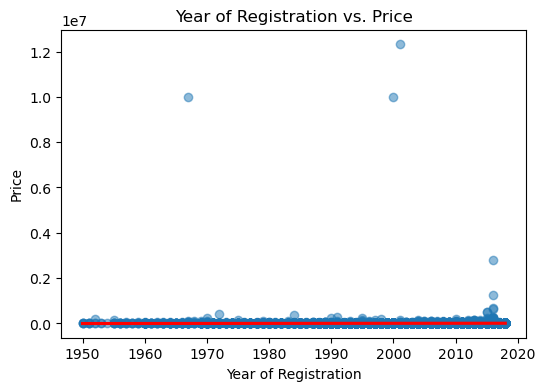

In [21]:

plt.figure(figsize=(6, 4))
sns.regplot(x='yearOfRegistration', y='price', data=cars_cleaned, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Year of Registration vs. Price')
plt.xlabel('Year of Registration')
plt.ylabel('Price')
plt.show()

In [22]:
price_count = cars_cleaned['price'].value_counts().sort_index()
print(price_count)

0           1402
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2391, dtype: int64


In [23]:
# Define a reasonable price range
min_price = 100  # Exclude prices below 100
max_price = 50000  # Assume an upper limit for practical purposes

# Filter the dataset
cars_cleaned = cars_cleaned[(cars_cleaned['price'] >= min_price) & (cars_cleaned['price'] <= max_price)]


In [24]:
cars_cleaned['price'].value_counts().sort_index()

100      143
101        1
110        2
111        3
120       31
        ... 
49500      5
49650      1
49900      4
49999      2
50000      3
Name: price, Length: 2178, dtype: int64

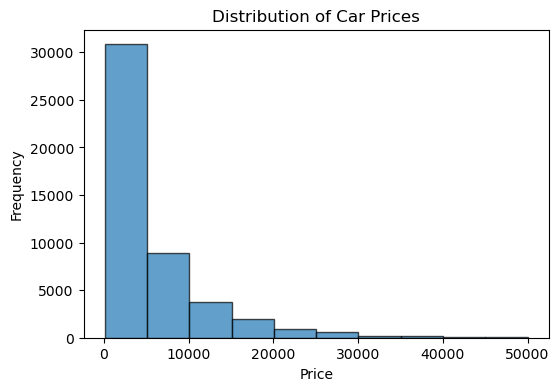

In [25]:
plt.figure(figsize=(6, 4))
plt.hist(cars_cleaned['price'],edgecolor='k', alpha=0.7)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [26]:
power_count = df1['powerPS'].value_counts().sort_index()
print(power_count)

0        5605
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64


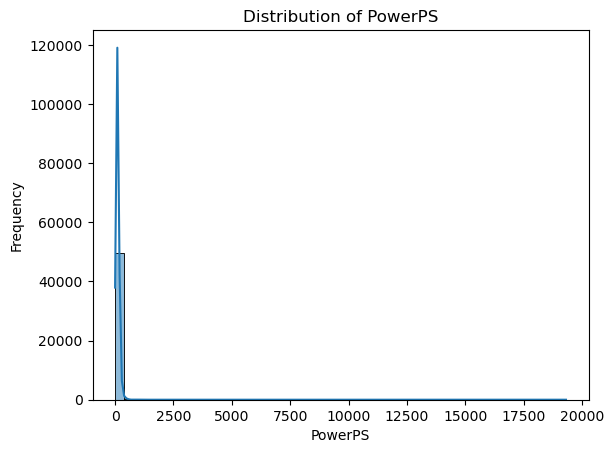

In [27]:
sns.histplot(df1['powerPS'], bins=50, kde=True)
plt.title('Distribution of PowerPS')
plt.xlabel('PowerPS')
plt.ylabel('Frequency')
plt.show()


In [28]:
df1['powerPS'].describe()

count   50001.000
mean      116.496
std       230.568
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

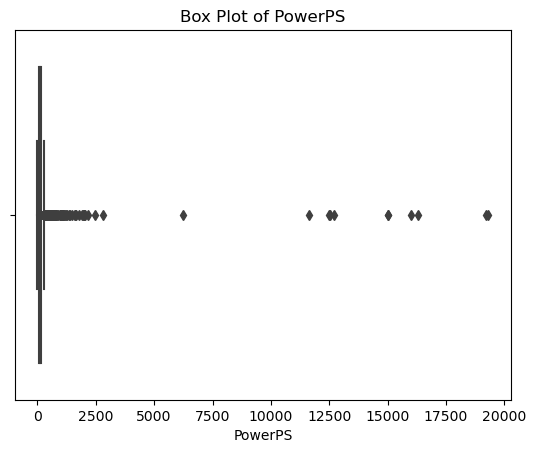

In [29]:
sns.boxplot(x=df1['powerPS'])
plt.title('Box Plot of PowerPS')
plt.xlabel('PowerPS')
plt.show()


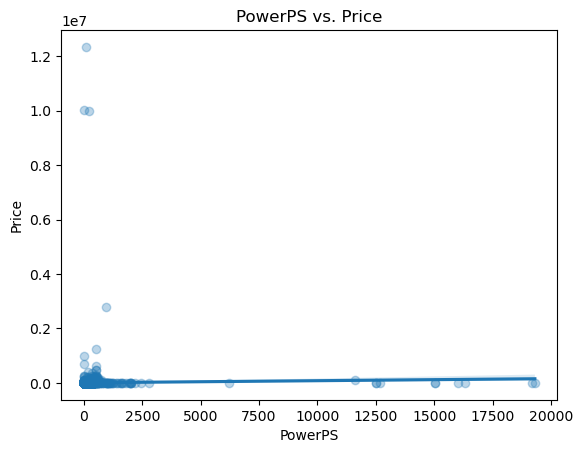

In [30]:
sns.regplot(x='powerPS', y='price', data=df1, scatter_kws={'alpha':0.3})
plt.title('PowerPS vs. Price')
plt.xlabel('PowerPS')
plt.ylabel('Price')
plt.show()


In [31]:
# Define a reasonable power range
min_power = 10  # Minimum power to start a vehicle
max_power = 500  # Upper limit for practical purposes

In [32]:
# Filter the dataset
cars_cleaned = cars_cleaned[(cars_cleaned['powerPS'] >= min_power) & (cars_cleaned['powerPS'] <= max_power)]


In [33]:
power_count_filtered = cars_cleaned['powerPS'].value_counts().sort_index()
print(power_count_filtered)

10     2
11     4
12     4
13     1
14     6
      ..
481    1
483    1
487    4
489    1
500    9
Name: powerPS, Length: 362, dtype: int64


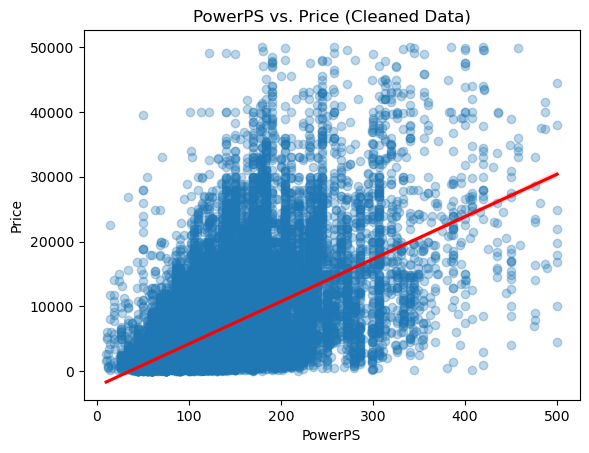

In [34]:
sns.regplot(x='powerPS', y='price', data=cars_cleaned, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('PowerPS vs. Price (Cleaned Data)')
plt.xlabel('PowerPS')
plt.ylabel('Price')
plt.show()


Key Observations:
1. **General Trend**:
   - The plot shows a positive correlation between `Power` and `Price`. As the power of the car increases, the price also tends to increase.
   - This is indicated by the upward sloping line, which represents the trend.

2. **Data Points**:
   - Each point on the plot represents a car. The x-axis shows the power in PS, and the y-axis shows the price in dollars.
   - The density of points indicates how many cars fall within a specific range of power and price.

3. **Distribution**:
   - Most of the data points are concentrated between `Power` values of approximately 50 to 250.
   - There are fewer cars with `Power` values towards the higher end of the spectrum (closer to 500).

4. **Price Range**:
   - The prices range from very low values up to around 50,000. 
   - There is a clear increase in price with higher `Power` values, though there are some cars with higher `Power` that are still relatively inexpensive, suggesting other factors might also influence price.

5. **Outliers**:
   - While the plot shows a general trend, there are several outliers. For instance, there are some cars with `Power` near the higher end but with much lower prices.
   - These outliers indicate that while power is a significant factor, it's not the only determinant of price.

6. **Effect of Cleaning**:
   - The scatter plot is much clearer after cleaning the data by removing unrealistic values and outliers.
   - Without the extreme values, the plot now better represents the relationship between power and price.

#### Conclusion:
* The scatter plot of `Power` vs. `Price` for cleaned data shows a clear positive correlation. As the power of the car increases, so does its price. However, there are still variations and outliers, indicating that other factors also play a role in determining the price of pre-owned cars. This cleaned data provides a more accurate representation for building a predictive model for car prices.


****
**The Ai Academy**
****

In [35]:
cars_cleaned.shape

(42614, 14)

In [36]:
#make copy of cars_cleaned data
cars_age = cars_cleaned.copy(deep=True)

In [37]:
cars_age.loc[:, 'monthOfRegistration'] = cars_age['monthOfRegistration'] / 12

In [38]:
#Calculate the age
cars_age['age'] = 2018 - cars_age['yearOfRegistration'] + cars_age['monthOfRegistration']


In [39]:
cars_age['age'] = cars_age['age'].round(2)

In [40]:
#Set the display option in pandas to show only two decimal places.
pd.set_option('display.float_format', '{:.2f}'.format)

In [41]:
cars_age['age'].head

<bound method NDFrame.head of 0       15.25
1       13.50
2       15.92
3       13.00
4       10.92
         ... 
49991   14.67
49992   20.75
49993   19.67
49995   17.25
50000   12.83
Name: age, Length: 42614, dtype: float64>

In [42]:
print(cars_age['age'].describe())

count   42614.00
mean       14.87
std         7.05
min         0.00
25%        10.33
50%        14.83
75%        19.17
max        67.75
Name: age, dtype: float64


In [43]:
# Dropping redundant columns
cars_age = cars_age.drop(['yearOfRegistration', 'monthOfRegistration'], axis=1)

In [44]:
cars_age.shape

(42614, 13)

In [45]:
cars_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42614 entries, 0 to 50000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller             42614 non-null  object 
 1   offerType          42614 non-null  object 
 2   price              42614 non-null  int64  
 3   abtest             42614 non-null  object 
 4   vehicleType        39739 non-null  object 
 5   gearbox            41823 non-null  object 
 6   powerPS            42614 non-null  int64  
 7   model              40951 non-null  object 
 8   kilometer          42614 non-null  int64  
 9   fuelType           40018 non-null  object 
 10  brand              42614 non-null  object 
 11  notRepairedDamage  36340 non-null  object 
 12  age                42614 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 4.6+ MB


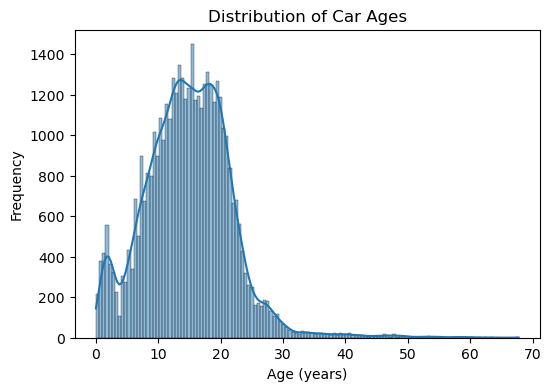

In [46]:
# Visualizing the age distribution with a histogram
plt.figure(figsize=(6, 4))
sns.histplot(cars_age['age'], kde=True)
plt.title('Distribution of Car Ages')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()


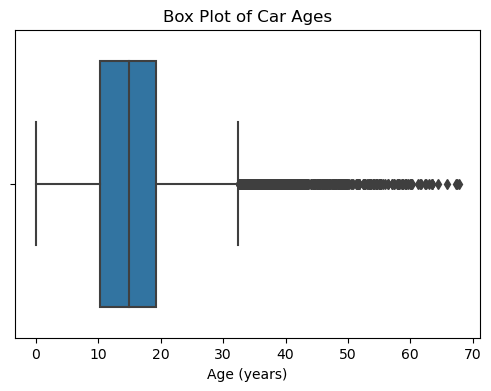

In [47]:
# Visualizing the age distribution with a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=cars_age['age'])
plt.title('Box Plot of Car Ages')
plt.xlabel('Age (years)')
plt.show()


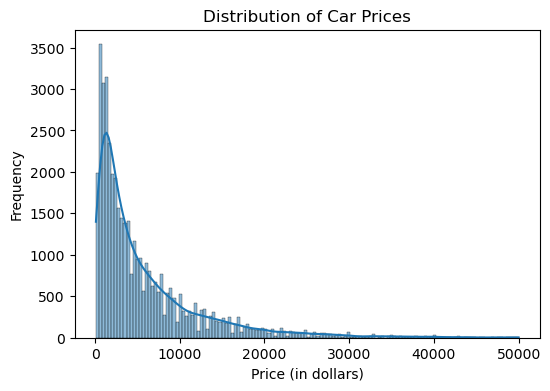

In [48]:
# Visualizing the price distribution with a histogram
plt.figure(figsize=(6, 4))
sns.histplot(cars_age['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in dollars)')
plt.ylabel('Frequency')
plt.show()


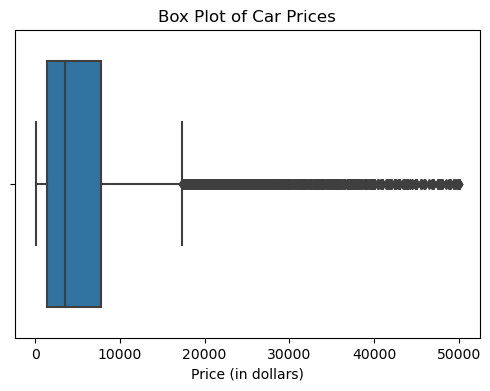

In [49]:
# Visualizing the price distribution with a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=cars_age['price'])
plt.title('Box Plot of Car Prices')
plt.xlabel('Price (in dollars)')
plt.show()

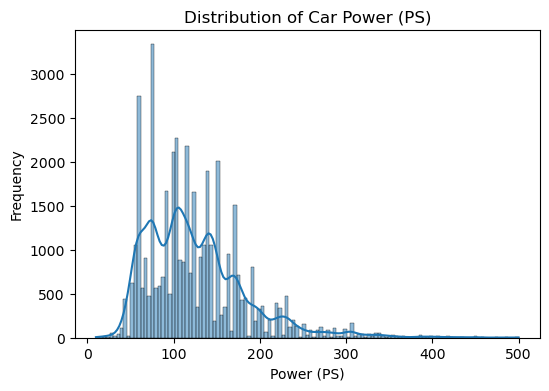

In [50]:
# Visualizing the powerPS distribution with a histogram
plt.figure(figsize=(6, 4))
sns.histplot(cars_age['powerPS'], kde=True)
plt.title('Distribution of Car Power (PS)')
plt.xlabel('Power (PS)')
plt.ylabel('Frequency')
plt.show()


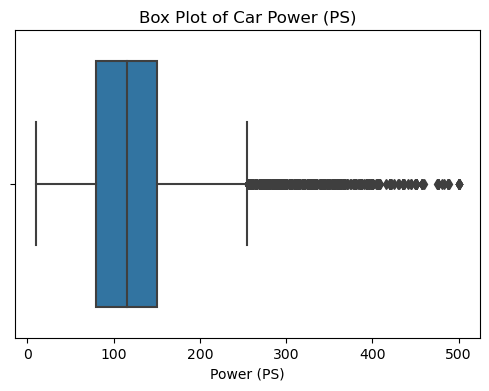

In [51]:
# Visualizing the powerPS distribution with a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=cars_age['powerPS'])
plt.title('Box Plot of Car Power (PS)')
plt.xlabel('Power (PS)')
plt.show()


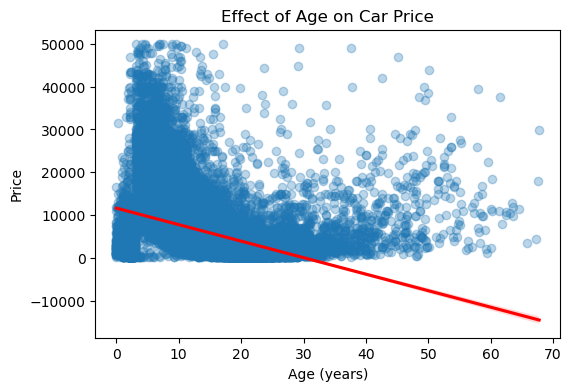

In [52]:
# Plotting age versus price
plt.figure(figsize=(6, 4))
sns.regplot(x='age', y='price', data=cars_age, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Effect of Age on Car Price')
plt.xlabel('Age (years)')
plt.ylabel('Price')
plt.show()


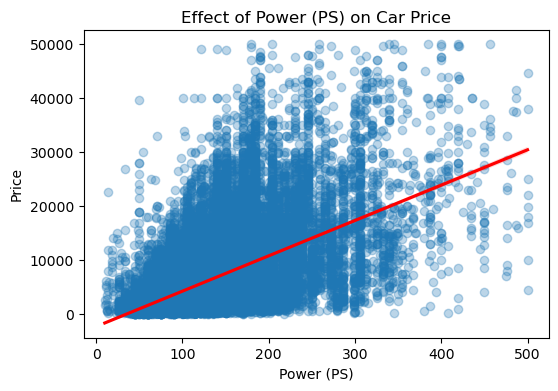

In [53]:
# Plotting powerPS versus price
plt.figure(figsize=(6, 4))
sns.regplot(x='powerPS', y='price', data=cars_age, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Effect of Power (PS) on Car Price')
plt.xlabel('Power (PS)')
plt.ylabel('Price')
plt.show()


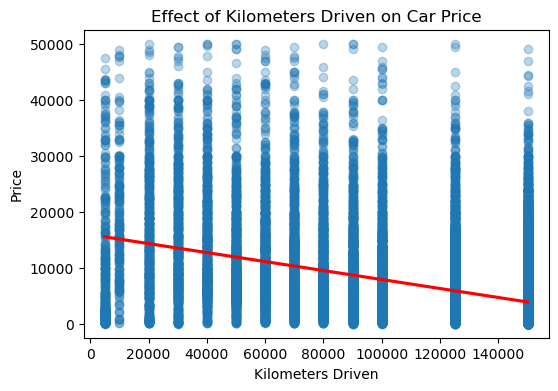

In [54]:
# Plotting kilometer versus price
plt.figure(figsize=(6, 4))
sns.regplot(x='kilometer', y='price', data=cars_age, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Effect of Kilometers Driven on Car Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()


In [55]:
# Checking the frequency count for 'seller'
seller_counts = cars_age['seller'].value_counts()
print(seller_counts)


private       42613
commercial        1
Name: seller, dtype: int64


In [56]:
# Dropping the 'seller' column as it is insignificant
cars_age.drop(columns=['seller'], inplace=True)
cars_age.shape

(42614, 12)

In [57]:
# Checking frequency counts for other categorical variables
offerType_counts = cars_age['offerType'].value_counts()
abtest_counts = cars_age['abtest'].value_counts()
vehicleType_counts = cars_age['vehicleType'].value_counts()
gearbox_counts = cars_age['gearbox'].value_counts()

print("Offer Type Counts:\n", offerType_counts)
print("AB Test Counts:\n", abtest_counts)
print("Vehicle Type Counts:\n", vehicleType_counts)
print("Gearbox Counts:\n", gearbox_counts)

Offer Type Counts:
 offer    42614
Name: offerType, dtype: int64
AB Test Counts:
 test       22037
control    20577
Name: abtest, dtype: int64
Vehicle Type Counts:
 limousine        11729
small car         9285
station wagon     8070
bus               3591
cabrio            2736
coupe             2210
suv               1792
others             326
Name: vehicleType, dtype: int64
Gearbox Counts:
 manual       32517
automatic     9306
Name: gearbox, dtype: int64


In [58]:
# Dropping the 'seller' column as it is insignificant
cars_age.drop(columns=['offerType'], inplace=True)
cars_age.shape

(42614, 11)

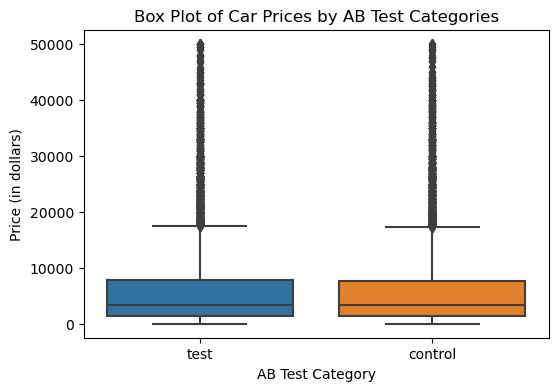

In [59]:
plt.figure(figsize=(6, 4))

# Create the box plot
sns.boxplot(x='abtest', y='price', data=cars_age)

# Adding title and labels
plt.title('Box Plot of Car Prices by AB Test Categories')
plt.xlabel('AB Test Category')
plt.ylabel('Price (in dollars)')

# Show the plot
plt.show()

In [60]:
# Dropping the 'abtest column as it is insignificant
cars_age.drop(columns=['abtest'], inplace=True)
cars_age.shape

(42614, 10)

In [61]:
# Checking the frequency counts for 'vehicleType'
vehicleType_counts = cars_age['vehicleType'].value_counts()
print("Vehicle Type Counts:\n", vehicleType_counts)

# Checking the frequency counts for 'gearbox'
gearbox_counts = cars_age['gearbox'].value_counts()
print("Gearbox Counts:\n", gearbox_counts)

Vehicle Type Counts:
 limousine        11729
small car         9285
station wagon     8070
bus               3591
cabrio            2736
coupe             2210
suv               1792
others             326
Name: vehicleType, dtype: int64
Gearbox Counts:
 manual       32517
automatic     9306
Name: gearbox, dtype: int64


In [62]:
# Checking the frequency counts for 'vehicleType'
vehicleType_counts = cars_age['vehicleType'].value_counts()
print("Vehicle Type Counts:\n", vehicleType_counts)

Vehicle Type Counts:
 limousine        11729
small car         9285
station wagon     8070
bus               3591
cabrio            2736
coupe             2210
suv               1792
others             326
Name: vehicleType, dtype: int64


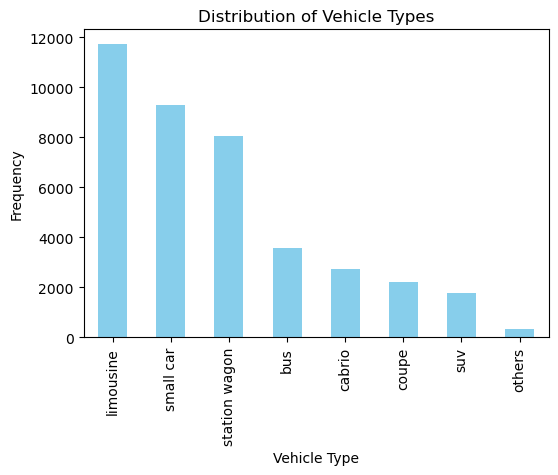

In [63]:
# Visualizing the distribution of vehicle types
plt.figure(figsize=(6, 4))
vehicleType_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Frequency')
plt.show()


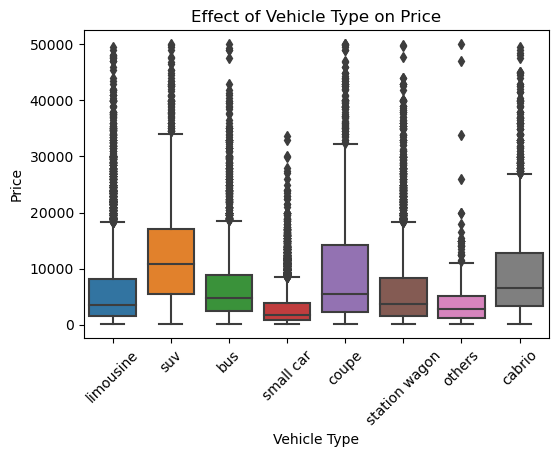

In [64]:
# Plotting a box plot to see the effect of vehicle type on price
plt.figure(figsize=(6, 4))
sns.boxplot(x='vehicleType', y='price', data=cars_age)
plt.title('Effect of Vehicle Type on Price')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [65]:
# Checking the frequency counts for 'gearbox'
gearbox_counts = cars_age['gearbox'].value_counts()
print("Gearbox Counts:\n", gearbox_counts)

Gearbox Counts:
 manual       32517
automatic     9306
Name: gearbox, dtype: int64


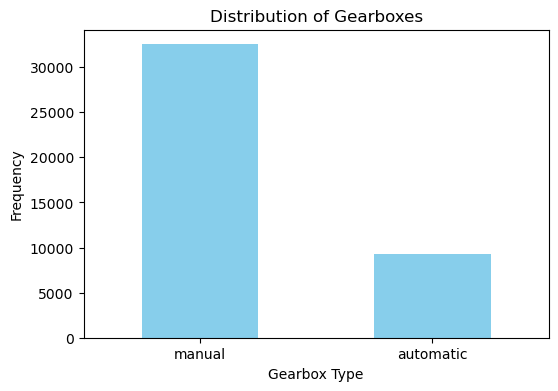

In [66]:
# Visualizing the distribution of gearboxes
plt.figure(figsize=(6, 4))
gearbox_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Gearboxes')
plt.xlabel('Gearbox Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [67]:
# Calculating proportions
gearbox_proportions = gearbox_counts / gearbox_counts.sum() * 100
print("Gearbox Proportions:\n", gearbox_proportions)

Gearbox Proportions:
 manual      77.75
automatic   22.25
Name: gearbox, dtype: float64


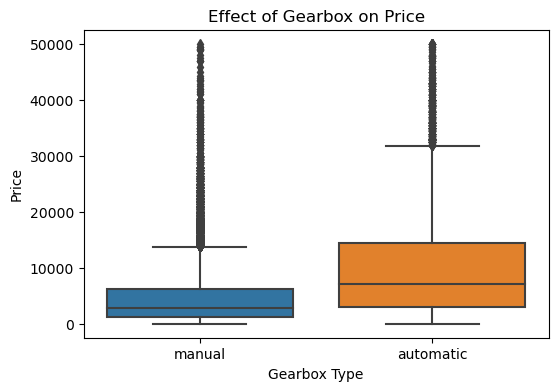

In [68]:
# Plotting a box plot to see the effect of gearbox on price
plt.figure(figsize=(6, 4))
sns.boxplot(x='gearbox', y='price', data=cars_age)
plt.title('Effect of Gearbox on Price')
plt.xlabel('Gearbox Type')
plt.ylabel('Price')
plt.show()

In [69]:
# Checking the frequency counts for 'model'
model_counts = cars_age['model'].value_counts()
print("Car Model Counts:\n", model_counts.head(10))  # Displaying top 10 for brevity


Car Model Counts:
 golf        3478
others      2871
3er         2482
polo        1500
corsa       1386
astra       1276
a4          1230
passat      1200
c_klasse    1040
5er         1013
Name: model, dtype: int64


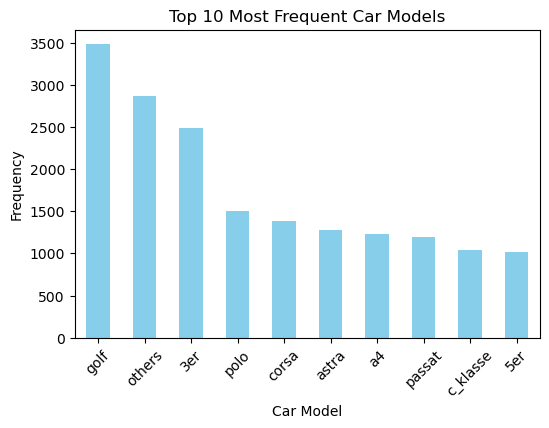

In [70]:
# Visualizing the distribution of top 10 car models
plt.figure(figsize=(6, 4))
model_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Car Models')
plt.xlabel('Car Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [71]:
# Checking the frequency counts for 'kilometer'
kilometer_counts = cars_age['kilometer'].value_counts().sort_index()
print("Kilometer Counts:\n", kilometer_counts)

Kilometer Counts:
 5000        469
10000       197
20000       624
30000       698
40000       778
50000       918
60000      1092
70000      1177
80000      1367
90000      1478
100000     1817
125000     4588
150000    27411
Name: kilometer, dtype: int64


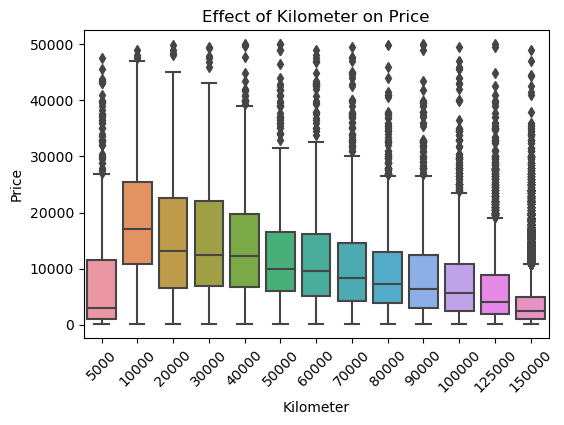

In [72]:
# Plotting a box plot to see the effect of kilometer on price
plt.figure(figsize=(6, 4))
sns.boxplot(x='kilometer', y='price', data=cars_age)
plt.title('Effect of Kilometer on Price')
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [73]:
# Checking the frequency counts for 'fuelType'
fuel_counts = cars_age['fuelType'].value_counts()
print("Fuel Type Counts:\n", fuel_counts)


Fuel Type Counts:
 petrol     26392
diesel     12815
lpg          690
cng           70
hybrid        35
electro       10
other          6
Name: fuelType, dtype: int64


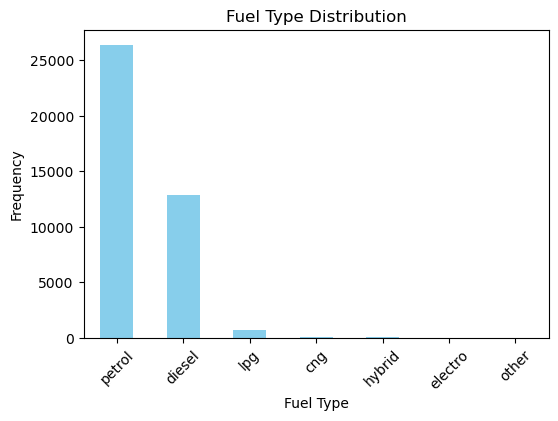

In [74]:
# Visualizing the distribution of fuel types
plt.figure(figsize=(6, 4))
fuel_counts.plot(kind='bar', color='skyblue')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

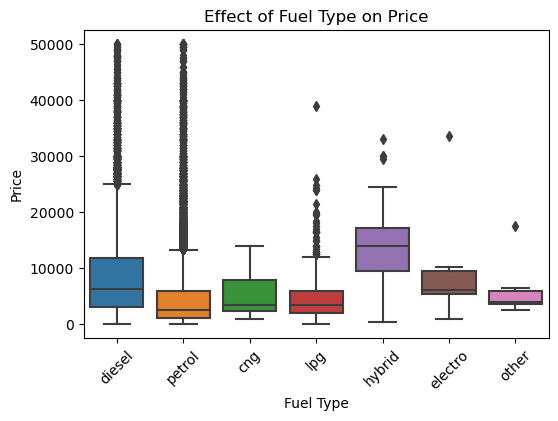

In [75]:
# Plotting a box plot to see the effect of fuel type on price
plt.figure(figsize=(6, 4))
sns.boxplot(x='fuelType', y='price', data=cars_age)
plt.title('Effect of Fuel Type on Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [76]:
# Checking the frequency counts for 'brand'
brand_counts = cars_age['brand'].value_counts()
print("Brand Counts:\n", brand_counts)

Brand Counts:
 volkswagen        9128
bmw               4859
opel              4487
mercedes_benz     4118
audi              3964
ford              2814
renault           1940
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     279
kia                276
suzuki             264
alfa_romeo         244
chevrolet          213
porsche            183
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          78
jaguar              74
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64


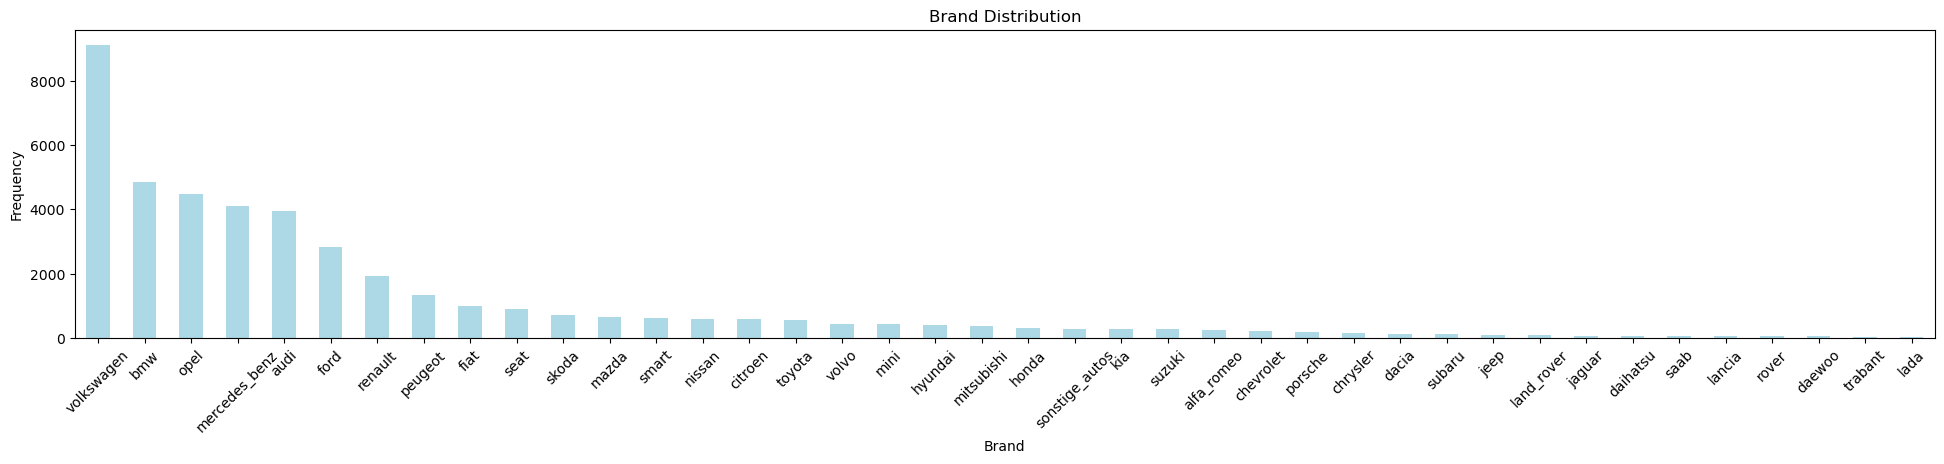

In [77]:
# Visualizing the distribution of car brands
plt.figure(figsize=(24, 4))
brand_counts.plot(kind='bar', color='lightblue')
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


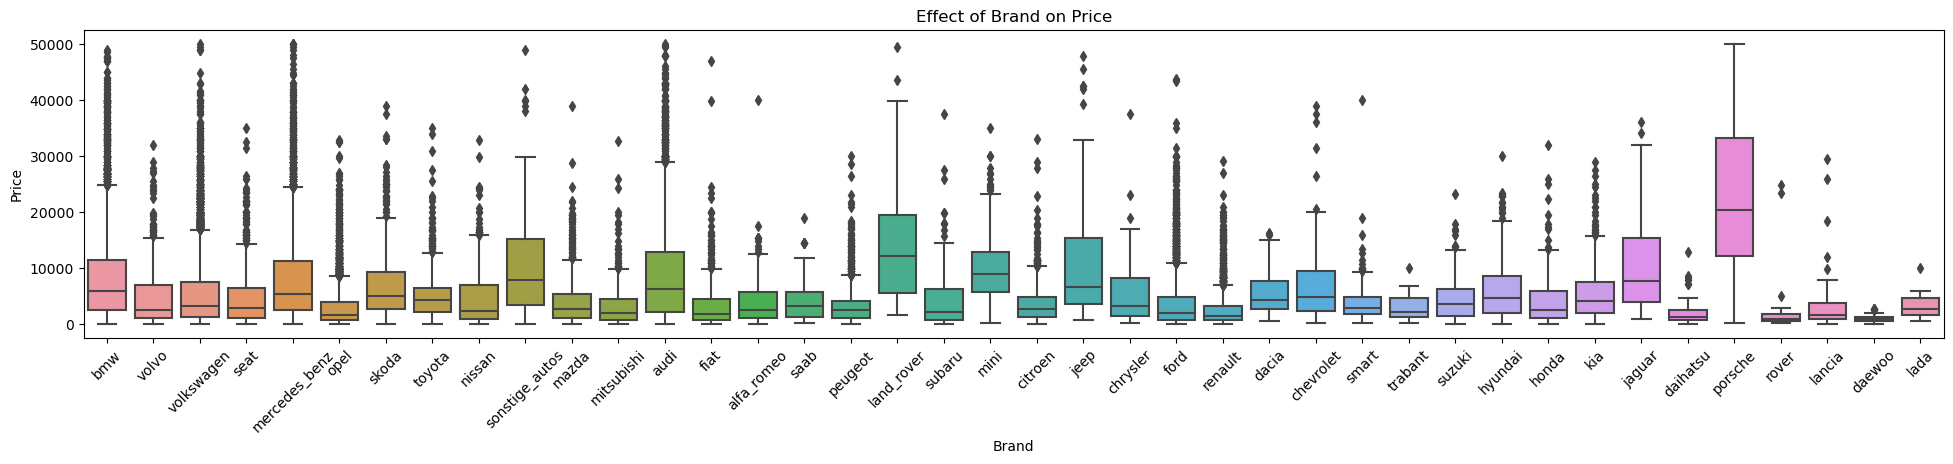

In [78]:
# Plotting a box plot to see the effect of brand on price
plt.figure(figsize=(24, 4))
sns.boxplot(x='brand', y='price', data=cars_age)
plt.title('Effect of Brand on Price')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [79]:
# Checking the frequency counts for 'notRepairedDamage'
damage_counts = cars_age['notRepairedDamage'].value_counts()
print("Not Repaired Damage Counts:\n", damage_counts)

Not Repaired Damage Counts:
 no     32353
yes     3987
Name: notRepairedDamage, dtype: int64


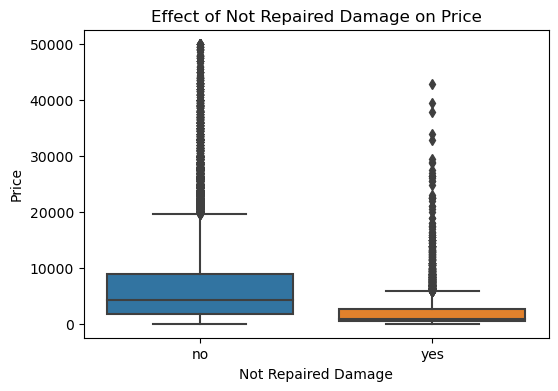

In [80]:
# Plotting a box plot to see the effect of 'notRepairedDamage' on price
plt.figure(figsize=(6, 4))
sns.boxplot(x='notRepairedDamage', y='price', data=cars_age)
plt.title('Effect of Not Repaired Damage on Price')
plt.xlabel('Not Repaired Damage')
plt.ylabel('Price')
plt.show()

In [81]:
cars_final = cars_age.copy(deep=True)

In [82]:
# Selecting numerical columns for correlation analysis
numerical_columns = cars_final.select_dtypes(exclude=['object'])

In [83]:
# Calculating the correlation matrix
correlation_matrix = numerical_columns.corr()
# Displaying the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
            price  powerPS  kilometer   age
price       1.00     0.57      -0.46 -0.40
powerPS     0.57     1.00       0.01 -0.15
kilometer  -0.46     0.01       1.00  0.29
age        -0.40    -0.15       0.29  1.00


In [84]:
# Extracting and sorting correlations specific to price
price_correlations = correlation_matrix.loc['price'].abs().sort_values(ascending=False)
print("Sorted Correlations with Price:\n", price_correlations)

Sorted Correlations with Price:
 price       1.00
powerPS     0.57
kilometer   0.46
age         0.40
Name: price, dtype: float64


### Here's a quick recap of what we covered:
* We started by addressing missing values, removing duplicates, and dropping unnecessary columns.
* We derived a new variable to accurately capture the age of each car using the year and month of registration.
* We explored the distributions of key numerical variables like (price, power, age, and kilometer) using histograms and box plots to identify and understand outliers.
* We calculated the correlation matrix to understand the relationships between the numerical variables and identified `power` as the most influential variable affecting the price.
* By refining our dataset and understanding these relationships, we've set a solid foundation for building our regression model.
* In the next lecture, we will continue our capstone project where,
* We will create and evaluate different regression models, starting with a simple linear regression and then exploring more complex models like Random Forest Regressor.
* We'll split our data into training and testing sets, train our models, and validate their performance.
* We'll use metrics such as Mean Absolute Error, Mean Squared Error, and R-squared to assess the accuracy of our models.
* For more complex models, we'll analyze feature importance to understand which variables contribute the most to predicting the price.
* We'll optimize our models by fine-tuning their hyperparameters to achieve better accuracy and generalization.


****
**The Ai Academy**
****

### Linear Regression and Random Forest Regression.

###### Linear Regression
* Linear regression is a simple and commonly used algorithm for predictive modeling. It attempts to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data. The main goal is to find the best-fit line that minimizes the difference between the predicted and actual values, often measured using metrics like RMSE (Root Mean Squared Error) and R-squared.

###### Random Forest Regression
* Random forest regression is a more complex and powerful algorithm that builds multiple decision trees during training and merges them to get a more accurate and stable prediction. It works well with both linear and non-linear data and can handle large datasets with higher dimensionality. Random forest regression reduces overfitting by averaging the results of many trees and improves predictive accuracy by capturing more complex patterns in the data.

##### Both algorithms are valuable tools in a data scientist's toolkit, with linear regression providing a straightforward and interpretable model, while random forest regression offers higher accuracy and robustness in many cases.


******
#### Two different sets of data. 
* The first set is created by removing any rows that have missing values. So, even if just one cell in a row is missing, we'll omit the entire row.
* The second data set is where we handle missing values by imputing them. Instead of discarding rows with missing data, we'll use an algorithm to fill in the gaps.


In [86]:
# Drop rows with any missing values
cars_neglect = cars_final.dropna(axis=0)
print(f"Original data shape: {cars_final.shape}")
print(f"Data shape after omitting missing values: {cars_neglect.shape}")

Original data shape: (42614, 10)
Data shape after omitting missing values: (32751, 10)


In [87]:
# hot encode categorical columns
cars_neglect = pd.get_dummies(cars_neglect, drop_first=True)
print(f"Data shape after dummy encoding: {cars_neglect.shape}")

Data shape after dummy encoding: (32751, 301)


*****
#### Importing some necessary libraries
1. **Train-Test Split**: We'll import the `train_test_split` function from `sklearn.model_selection`. This function is essential because we need to split our data into a training set and a test set. The training set will be used to build our model, while the test set will be used to evaluate its performance.

2. **Linear Regression**: We'll import the `LinearRegression` function from `sklearn.linear_model`. This function will help us build a linear regression model to predict car prices.

3. **Random Forest Regressor**: We'll import the `RandomForestRegressor` from `sklearn.ensemble`. This function will be used to build a random forest regression model, which is another powerful technique for predicting continuous variables like car prices.

4. **Mean Squared Error**: We'll import the `mean_squared_error` function from `sklearn.metrics`. This metric will allow us to evaluate the performance of our regression models by calculating the average squared difference between the predicted and actual values.

In [88]:
# Import Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

**Separate Input and Output Features**:
   - For the input features (`x1`), we need to drop the 'price' column from `cars_omit` and keep the rest. This ensures `x1` contains all the features except for the target variable.
   - For the output feature (`y1`), we'll isolate the 'price' column from `cars_omit`.


In [89]:
# Dropping the 'price' column from input features
x1 = cars_neglect.drop(columns=['price'], inplace=False)

# Isolating the 'price' column as the output feature
y1 = cars_neglect['price']
print("x1 Shape :", x1.shape)
print("y1 Shape :", y1.shape)

x1 Shape : (32751, 300)
y1 Shape : (32751,)


**Transforming the Price**:
   - We will now plot the variable price before and after transforming it into its natural logarithm to visualize the distribution.
   - The reason for this transformation is that the natural logarithm of the price often yields a more normal (bell-shaped) distribution, which can improve the performance of our regression models.


In [90]:
# Creating a DataFrame to compare the price before and after the logarithmic transformation
prices_df = pd.DataFrame({'before': y1, 'after': np.log(y1)})

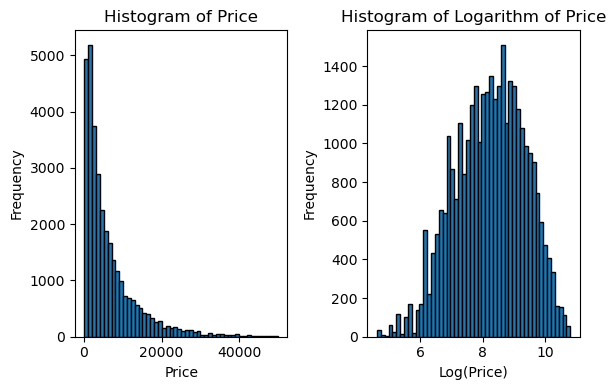

In [91]:
# Plotting histograms to compare the distributions
plt.figure(figsize=(6, 4))
# Histogram of the original price
plt.subplot(1, 2, 1)
plt.hist(prices_df['before'], bins=50, edgecolor='k')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram of the logarithm of price
plt.subplot(1, 2, 2)
plt.hist(prices_df['after'], bins=50, edgecolor='k')
plt.title('Histogram of Logarithm of Price')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [92]:
# Transforming the price to its natural logarithm
y1_log = np.log(y1)

**Split the Data**:
   - We will now split the data into training and testing sets. This involves using the `train_test_split` function, which we've already imported.
   - We’ll allocate 70% of the data to the training set and the remaining 30% to the testing set.
   - `x1` and `y1_log` are the input features and the transformed output feature, respectively.
  - `test_size=0.3` indicates that 30% of the data will be used for testing.
  - `random_state=3` ensures reproducibility of the split.



In [93]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1_log, test_size=0.3, random_state=3)

In [94]:
# Printing the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22925, 300)
y_train shape: (22925,)
X_test shape: (9826, 300)
y_test shape: (9826,)


In [95]:
# Building a baseline model mean_squared_error (MSE)
baseline_pred = np.mean(y_test)

# Calculating the mean squared error for the baseline model
from sklearn.metrics import mean_squared_error

baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))
print("Baseline Mean Squared Error:", baseline_mse)

Baseline Mean Squared Error: 1.2483194508660285


In [96]:
# Building a baseline model for Root Mean Squared Error (RMSE) 
base_pred = np.mean(y_test)
# Replicating the mean value across all test records
base_predictions = [base_pred] * len(y_test)
# Calculating the mean squared error
base_mse = mean_squared_error(y_test, base_predictions)

# Calculating the root mean squared error
base_rmse = np.sqrt(base_mse)
print("Baseline RMSE:", base_rmse)


Baseline RMSE: 1.117282171551139


In [97]:
from sklearn.linear_model import LinearRegression
# Initializing the Linear Regression model
lgr = LinearRegression(fit_intercept=True)
# Fitting the model on the training data
model_linear_1 = lgr.fit(X_train, y_train)


In [98]:
# Predicting on the test set
cars_predictions_linear_1 = model_linear_1.predict(X_test)

In [99]:
# Calculating the RMSE
mse_linear_1 = mean_squared_error(y_test, cars_predictions_linear_1)
rmse_linear_1 = np.sqrt(mse_linear_1)
print("RMSE for Linear Regression Model:", rmse_linear_1)

RMSE for Linear Regression Model: 0.5310805037248527


In [100]:
# Calculating R-squared for test and train data
r2_test = model_linear_1.score(X_test, y_test)
r2_train = model_linear_1.score(X_train, y_train)
print("R-squared for Test Data:", r2_test)
print("R-squared for Train Data:", r2_train)

R-squared for Test Data: 0.7740590349361519
R-squared for Train Data: 0.7781861863206315


#### Regression Diagnostics 
- **Residual Analysis**:
  - Examining residuals (differences between actual and predicted values) can help identify patterns that indicate issues like heteroscedasticity or non-linearity.

- **Variance Inflation Factor (VIF)**:
  - Checking VIF helps identify multicollinearity issues where independent variables are highly correlated.

- **Normality of Residuals**:
  - Ensuring residuals are normally distributed validates the assumption of linear regression.


In [101]:
# Calculating residuals
residuals = y_test - cars_predictions_linear_1
print(residuals)

12382   -0.09
36300    0.34
38051   -0.13
26729    0.56
45472   -0.34
         ... 
26698    0.21
38518   -0.57
37659   -0.05
49372   -0.26
7457    -0.11
Name: price, Length: 9826, dtype: float64


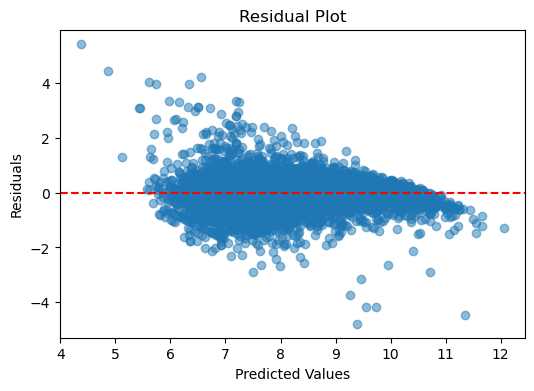

In [102]:
# Generating the residual plot
plt.figure(figsize=(6, 4))
plt.scatter(cars_predictions_linear_1, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [103]:
# Describing the residuals
residuals_description = residuals.describe()
print(residuals_description)

count   9826.00
mean      -0.01
std        0.53
min       -4.78
25%       -0.26
50%        0.03
75%        0.27
max        5.42
Name: price, dtype: float64


### Next Steps

1. **Random Forest Regression**: We'll build a random forest regression model and compare its performance with the linear regression model.
2. **Imputation of Missing Values**: We'll also use data where missing values have been imputed and repeat the model building process to see if imputing missing values improves the model's performance.
3. **Setting Parameters**:
   - The Random Forest Regressor has several parameters:
     - `n_estimators`: The number of trees in the forest.
     - `max_depth`: The maximum depth of each tree.
     - `min_samples_split`: The minimum number of samples required to split an internal node.
     - `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
     - `max_features`: The number of features to consider when looking for the best split.
     - `random_state`: Ensures the same results on every run.


In [104]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=1.0, random_state=1)


In [108]:
# Fit the model on the training data
rf.fit(X_train, y_train)

# Predicting on the test data
cars_predictions_rf1 = rf.predict(X_test)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, cars_predictions_rf1))
print(f"RMSE for Random Forest: {rmse_rf:.2f}")

# Calculate R-squared
r2_test_rf = rf.score(X_test, y_test)
r2_train_rf = rf.score(X_train, y_train)
print(f"R-squared for Test: {r2_test_rf:.2f}")
print(f"R-squared for Train: {r2_train_rf:.2f}")

RMSE for Random Forest: 0.45
R-squared for Test: 0.84
R-squared for Train: 0.88


### Imputed Data 
1. **Handle Missing Values**: We'll see how imputing missing values affects the performance of both the Linear Regression and Random Forest models.
2. **Model Comparison**: We'll compare the models built using omitted data and imputed data to determine the best approach for our car price prediction task.
2. **Imputing Missing Values**:
   - Use the `apply` function along with a lambda function to impute missing values.
   - For columns with float data types, fill missing values with the median.
   - For columns with object data types (categorical), fill missing values with the most frequent category.

3. **Building Models**:
   - After imputing the missing values, we will build the Linear Regression and Random Forest models on the imputed dataset.

In [109]:
# Impute missing values
cars_imputed = cars_final.apply(lambda x: x.fillna(x.median()) if x.dtype == 'float' else x.fillna(x.mode()[0]))

In [110]:
# Check for any remaining null values
print(cars_imputed.isnull().sum())

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
age                  0
dtype: int64


In [111]:
cars_imputed.shape

(42614, 10)

In [112]:
# Dummy encoding categorical variables
cars_imputed_dummies = pd.get_dummies(cars_imputed, drop_first=True)

In [114]:
cars_imputed_dummies.shape

(42614, 304)

In [115]:
# Separating input features and target variable
X2 = cars_imputed_dummies.drop('price', axis=1)
y2 = cars_imputed_dummies['price']

In [116]:
# Splitting the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [117]:
# Linear Regression Model
lin_reg_imputed = LinearRegression()
lin_reg_imputed.fit(X2_train, y2_train)

LinearRegression()

In [118]:
y2_pred_lin = lin_reg_imputed.predict(X2_test)

In [119]:
rmse_lin_imputed = np.sqrt(mean_squared_error(y2_test, y2_pred_lin))
print(f"RMSE for Linear Regression (Imputed Data): {rmse_lin_imputed:.2f}")


RMSE for Linear Regression (Imputed Data): 3812.19


In [120]:
# R-squared
r2_test_lin_imputed = lin_reg_imputed.score(X2_test, y2_test)
r2_train_lin_imputed = lin_reg_imputed.score(X2_train, y2_train)
print(f"R-squared for Test (Linear Regression, Imputed Data): {r2_test_lin_imputed:.2f}")
print(f"R-squared for Train (Linear Regression, Imputed Data): {r2_train_lin_imputed:.2f}")

R-squared for Test (Linear Regression, Imputed Data): 0.69
R-squared for Train (Linear Regression, Imputed Data): 0.71


In [123]:
# Random Forest Model
rf_imputed = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=1.0, random_state=1)
rf_imputed.fit(X2_train, y2_train)

RandomForestRegressor(max_depth=10, random_state=1)

In [124]:
# Predictions
y2_pred_rf = rf_imputed.predict(X2_test)


In [125]:
# RMSE
rmse_rf_imputed = np.sqrt(mean_squared_error(y2_test, y2_pred_rf))
print(f"RMSE for Random Forest (Imputed Data): {rmse_rf_imputed:.2f}")


RMSE for Random Forest (Imputed Data): 2750.56


In [126]:
# R-squared
r2_test_rf_imputed = rf_imputed.score(X2_test, y2_test)
r2_train_rf_imputed = rf_imputed.score(X2_train, y2_train)
print(f"R-squared for Test (Random Forest, Imputed Data): {r2_test_rf_imputed:.2f}")
print(f"R-squared for Train (Random Forest, Imputed Data): {r2_train_rf_imputed:.2f}")

R-squared for Test (Random Forest, Imputed Data): 0.84
R-squared for Train (Random Forest, Imputed Data): 0.90


In [127]:
print("Baseline Mean Squared Error:", baseline_mse)
print("Baseline RMSE:", base_rmse)
print("RMSE for Linear Regression Model:", rmse_linear_1)
print("R-squared for Test Data:", r2_test)
print("R-squared for Train Data:", r2_train)
print(f"RMSE for Random Forest: {rmse_rf:.2f}")
print(f"R-squared for Test: {r2_test_rf:.2f}")
print(f"RMSE for Linear Regression (Imputed Data): {rmse_lin_imputed:.2f}")
print(f"R-squared for Test (Linear Regression, Imputed Data): {r2_test_lin_imputed:.2f}")
print(f"R-squared for Train (Linear Regression, Imputed Data): {r2_train_lin_imputed:.2f}")
print(f"RMSE for Random Forest (Imputed Data): {rmse_rf_imputed:.2f}")
print(f"R-squared for Test (Random Forest, Imputed Data): {r2_test_rf_imputed:.2f}")
print(f"R-squared for Train (Random Forest, Imputed Data): {r2_train_rf_imputed:.2f}")

Baseline Mean Squared Error: 1.2483194508660285
Baseline RMSE: 1.117282171551139
RMSE for Linear Regression Model: 0.5310805037248527
R-squared for Test Data: 0.7740590349361519
R-squared for Train Data: 0.7781861863206315
RMSE for Random Forest: 0.45
R-squared for Test: 0.84
RMSE for Linear Regression (Imputed Data): 3812.19
R-squared for Test (Linear Regression, Imputed Data): 0.69
R-squared for Train (Linear Regression, Imputed Data): 0.71
RMSE for Random Forest (Imputed Data): 2750.56
R-squared for Test (Random Forest, Imputed Data): 0.84
R-squared for Train (Random Forest, Imputed Data): 0.90
